In [0]:
file='/FileStore/tables/tcs_customer_churn.csv'
file_type='csv'
df=spark.read.csv(file,header=True,inferSchema=True)


In [0]:
df.show(5)

+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churn|
+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------

In [0]:
df.columns

Out[3]: ['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [0]:
df.select(['state','account_length','area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes']).show(10)

+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+
|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|
+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+
|   OH|           107|area_code_415|                no|            yes|                   26|            161.6|            123|           27.47|            195.5|
|   NJ|           137|area_code_415|                no|             no|                    0|            243.4|            114|           41.38|            121.2|
|   OH|            84|area_code_408|               yes|             no|                    0|            299.4|             71|            50.9|             61.9|
|   OK|            75|

In [0]:
df.select(['total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls','churn']).show(10)

+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churn|
+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|            103|           16.62|              254.4|              103|             11.45|              13.7|               3|              3.7|                            1|   no|
|            110|            10.3|              162.6|              104|              7.32|              12.2|               5|             3.29|                            0|   no|
|             88|            5.26|              196.9|               89|              8.86

In [0]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)
 |-- churn: string (nullable = true)



In [0]:
l=df.count()
print('The dataset contains',l,'rows')

The dataset contains 4250 rows


In [0]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
df.describe(numeric_features ).toPandas().transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 summary 
 count 
 mean 
 stddev 
 min 
 max 
 
 
 account_length 
 4250 
 100.23623529411765 
 39.6984005686773 
 1 
 243 
 
 
 number_vmail_messages 
 4250 
 7.631764705882353 
 13.439882196596512 
 0 
 52 
 
 
 total_day_minutes 
 4250 
 180.2595999999994 
 54.0123733314177 
 0.0 
 351.5 
 
 
 total_day_calls 
 4250 
 99.90729411764706 
 19.85081731214296 
 0 
 165 
 
 
 total_day_charge 
 4250 
 30.64468235294131 
 9.182096032769165 
 0.0 
 59.76 
 
 
 total_eve_minutes 
 4250 
 200.17390588235307 
 50.249518183794954 
 0.0 
 359.3 
 
 
 total_eve_calls 
 4250 
 100.17647058823529 
 19.90859110480936 
 0 
 170 
 
 
 total_eve_charge 
 4250 
 17.015011764705875 
 4.271211992240319 
 0.0 
 30.54 
 
 
 total_night_minutes 
 4250 
 200.52788235294165 
 50.35354807463601 
 0.0 
 395.0 
 
 
 total_night_calls 
 4250 
 99.8395294117647 
 20.09321979024039 
 0 
 175 
 
 
 total_night_charge 
 4250 
 9.023891764705922 
 2.2659218112187354 
 0.0 
 17.77 
 
 
 total_intl_minutes 
 4250 
 10.256070588235291 
 2.7601017261885157 
 0.0 
 20.0 
 
 
 total_intl_calls 
 4250 
 4.426352941176471 
 2.463069112738743 
 0 
 20 
 
 
 total_intl_charge 
 4250 
 2.7696541176470455 
 0.7452041363842502 
 0.0 
 5.4 
 
 
 number_customer_service_calls 
 4250 
 1.5590588235294118 
 1.3114335302568632 
 0 
 9

In [0]:
###finding correlations

In [0]:
#let's make a sample of the data to get an idea
sample_df=df.select(numeric_features).sample(False, 0.10)
print('sample data contains', sample_df.count(),'observations')

sample data contains 418 observations


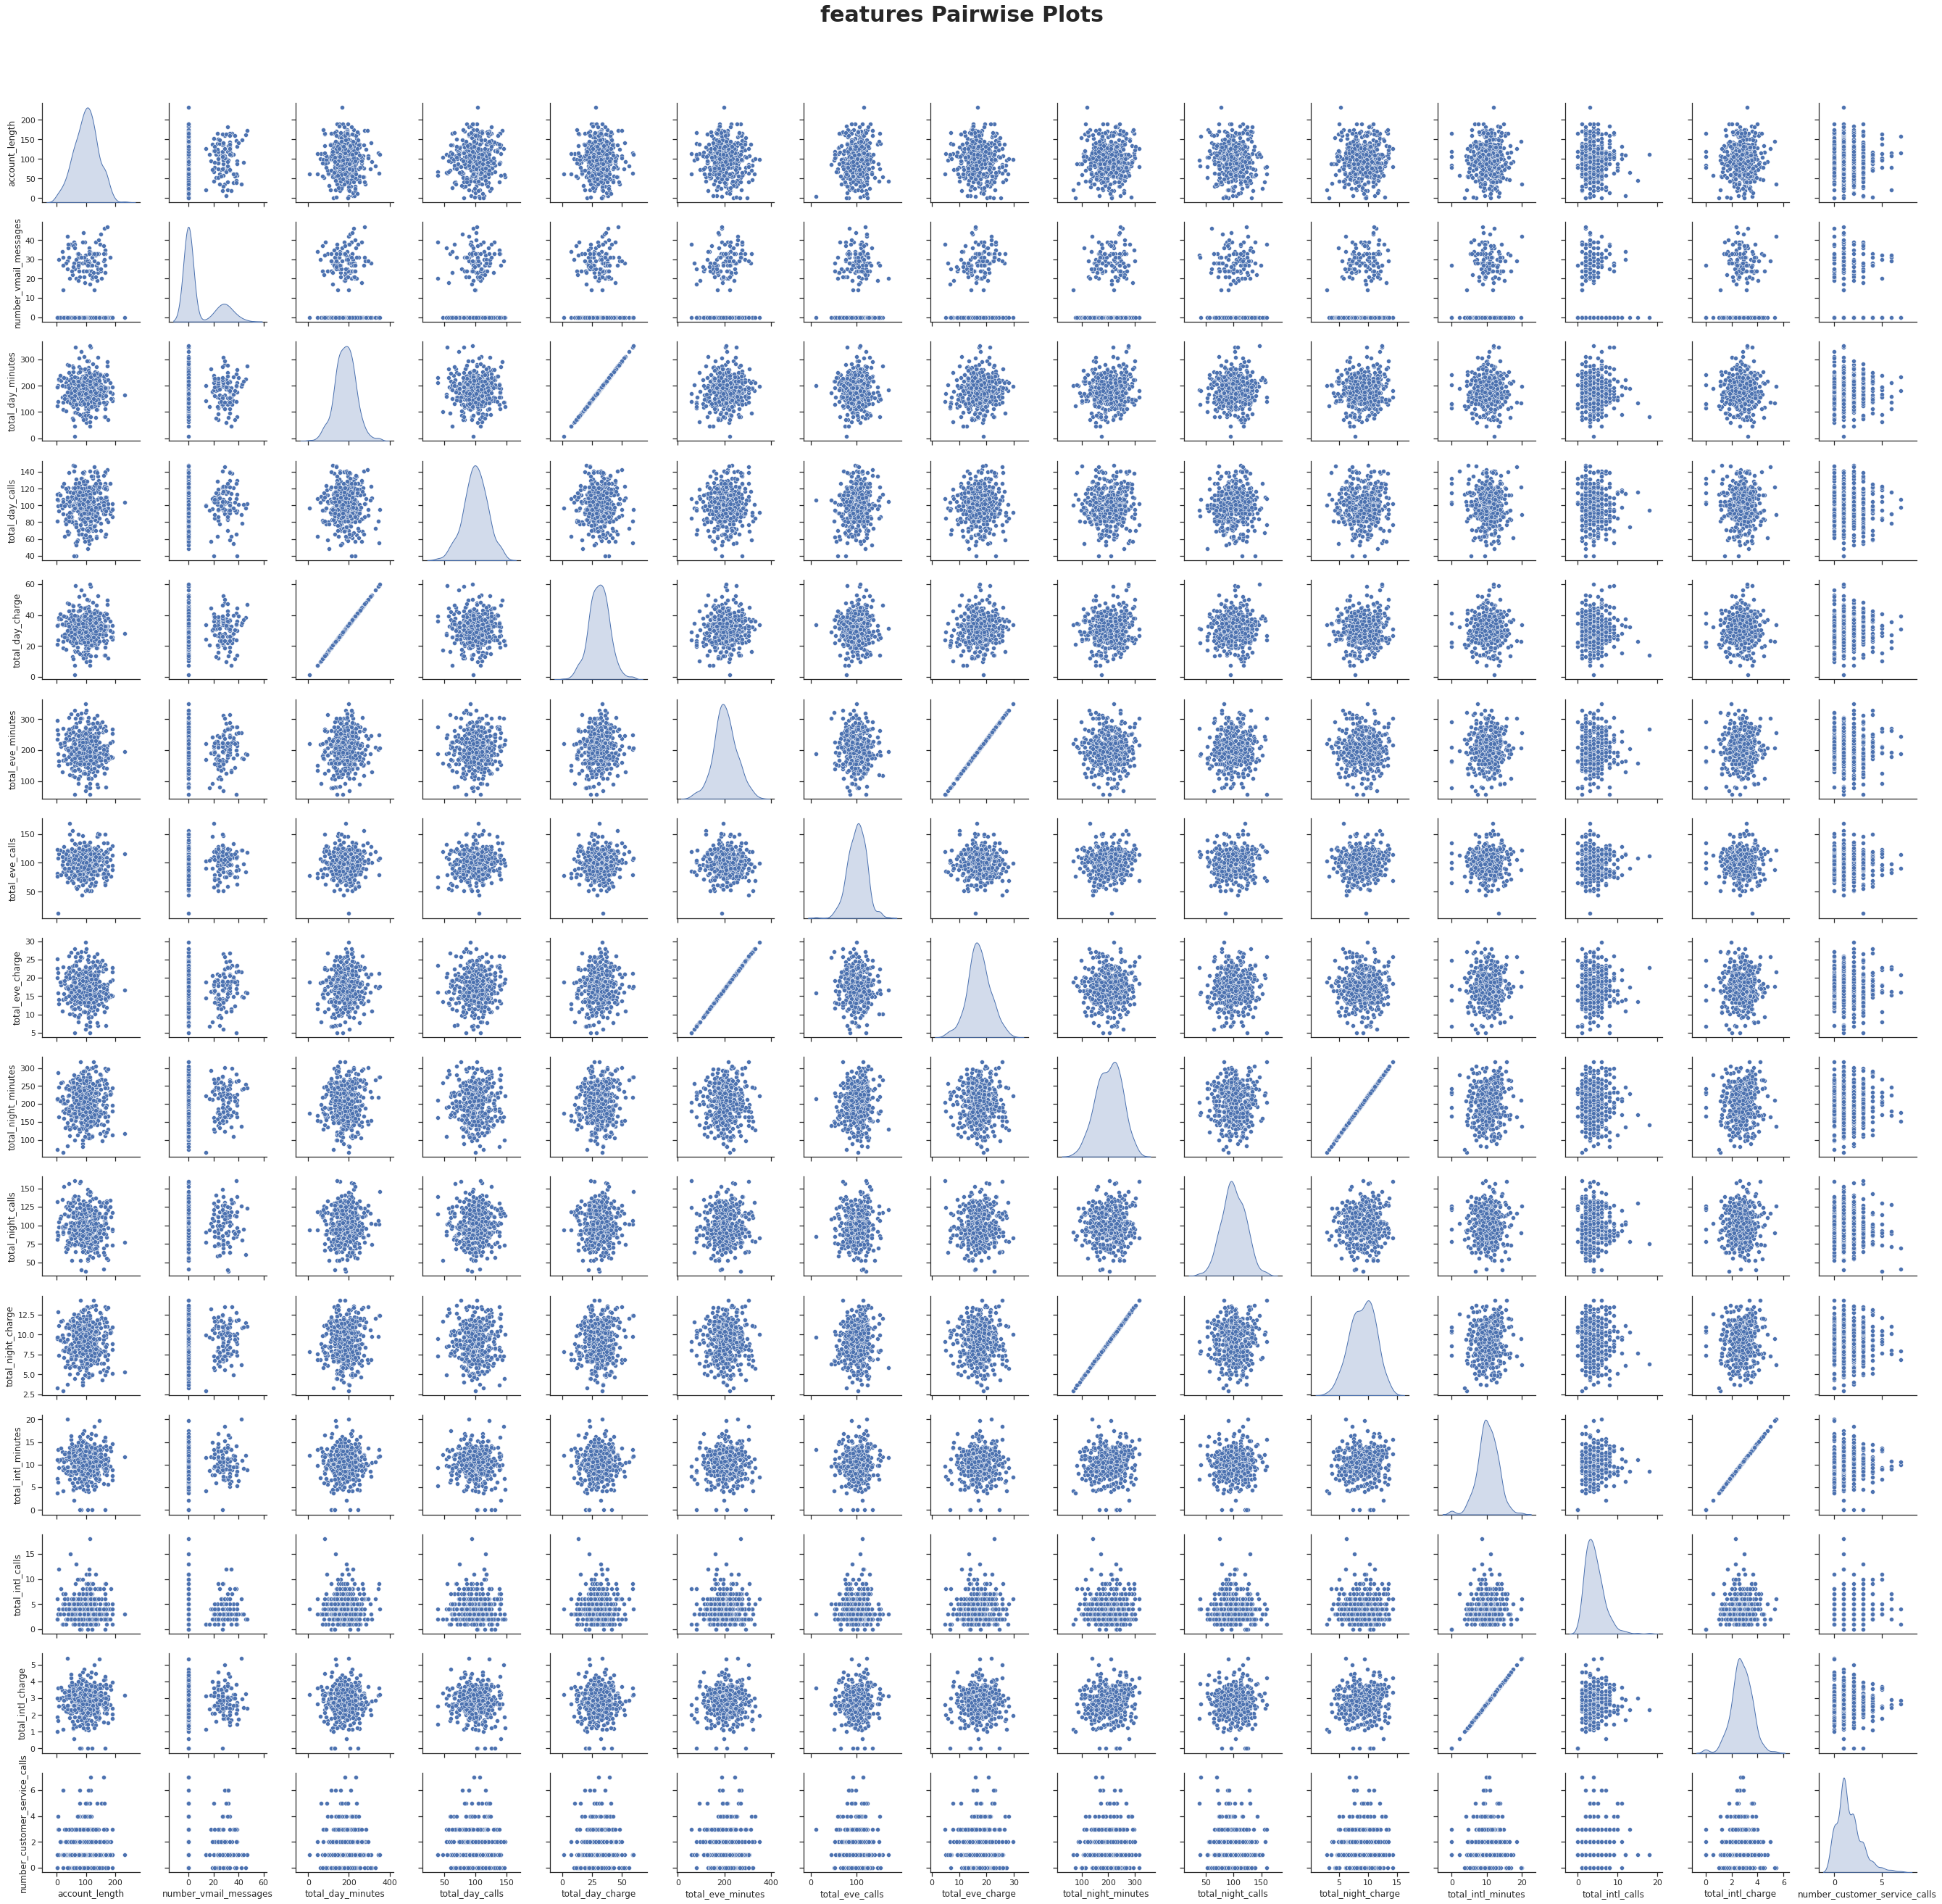

In [0]:
#so we can make scatterplot with this sample data to understand the correlation
import seaborn as sns
sns.set(style="ticks")
plot= sns.pairplot(sample_df.toPandas(), diag_kind="kde")
fig = plot.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('features Pairwise Plots', fontsize=30, fontweight='bold');


In [0]:
col=df.columns
col

Out[12]: ['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [0]:
#creating a function to remove some columns and convert some values into integer
def remove(data, removeCols):
    data= df.drop(*removeCols) \
        .withColumn("churn", when(df["churn"] == 'yes', 1.0).otherwise(0.0)) \
        .withColumn('international_plan', when(df["international_plan"] == 'yes', 1.0).otherwise(0.0)) \
        .withColumn('voice_mail_plan', when(df["voice_mail_plan"] == 'yes', 1.0).otherwise(0.0))
    return data

In [0]:
from pyspark.sql.functions import split, col, round, when

removeColumn = ['state','area_code','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']

df = remove(df,removeColumn)


In [0]:
#we have removed 'state','area_code','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge' this columns because they are not relevant for our analysis

In [0]:
df.columns

Out[16]: ['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls',
 'churn']

In [0]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

0 
 1 
 2 
 3 
 4 
 
 
 
 
 account_length 
 107.0 
 137.0 
 84.0 
 75.0 
 121.0 
 
 
 international_plan 
 0.0 
 0.0 
 1.0 
 1.0 
 0.0 
 
 
 voice_mail_plan 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 
 
 number_vmail_messages 
 26.0 
 0.0 
 0.0 
 0.0 
 24.0 
 
 
 total_day_minutes 
 161.6 
 243.4 
 299.4 
 166.7 
 218.2 
 
 
 total_day_calls 
 123.0 
 114.0 
 71.0 
 113.0 
 88.0 
 
 
 total_eve_minutes 
 195.5 
 121.2 
 61.9 
 148.3 
 348.5 
 
 
 total_eve_calls 
 103.0 
 110.0 
 88.0 
 122.0 
 108.0 
 
 
 total_night_minutes 
 254.4 
 162.6 
 196.9 
 186.9 
 212.6 
 
 
 total_night_calls 
 103.0 
 104.0 
 89.0 
 121.0 
 118.0 
 
 
 total_intl_minutes 
 13.7 
 12.2 
 6.6 
 10.1 
 7.5 
 
 
 total_intl_calls 
 3.0 
 5.0 
 7.0 
 3.0 
 7.0 
 
 
 number_customer_service_calls 
 1.0 
 0.0 
 2.0 
 3.0 
 3.0 
 
 
 churn 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0

In [0]:
col=df.columns
col

Out[18]: ['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls',
 'churn']

In [0]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=['account_length','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls','number_customer_service_calls'],outputCol='features')

In [0]:
output=assembler.transform(df)

In [0]:
final_data=output.select("features",'churn')

In [0]:
final_data.show()

+--------------------+-----+
|            features|churn|
+--------------------+-----+
|[107.0,0.0,1.0,26...|  0.0|
|[137.0,0.0,0.0,0....|  0.0|
|[84.0,1.0,0.0,0.0...|  0.0|
|[75.0,1.0,0.0,0.0...|  0.0|
|[121.0,0.0,1.0,24...|  0.0|
|[147.0,1.0,0.0,0....|  0.0|
|[117.0,0.0,0.0,0....|  0.0|
|[141.0,1.0,1.0,37...|  0.0|
|[65.0,0.0,0.0,0.0...|  1.0|
|[74.0,0.0,0.0,0.0...|  0.0|
|[168.0,0.0,0.0,0....|  0.0|
|[95.0,0.0,0.0,0.0...|  0.0|
|[161.0,0.0,0.0,0....|  1.0|
|[85.0,0.0,1.0,27....|  0.0|
|[76.0,0.0,1.0,33....|  0.0|
|[73.0,0.0,0.0,0.0...|  0.0|
|[147.0,0.0,0.0,0....|  0.0|
|[77.0,0.0,0.0,0.0...|  1.0|
|[130.0,0.0,0.0,0....|  0.0|
|[111.0,0.0,0.0,0....|  0.0|
+--------------------+-----+
only showing top 20 rows



In [0]:
training_data, testing_data = final_data.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
dtc= DecisionTreeClassifier(featuresCol="features", labelCol="churn",maxDepth=2, maxBins=32,impurity="gini")

In [0]:
dt_model=dtc.fit(training_data)


In [0]:
dtc_prediction=dt_model.transform(testing_data)
dtc_prediction.show(5)

+--------------------+-----+--------------+--------------------+----------+
|            features|churn| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(13,[0,4,5,6,7,8,...|  0.0|  [36.0,124.0]|       [0.225,0.775]|       1.0|
|(13,[0,4,5,6,7,8,...|  0.0|[2721.0,220.0]|[0.92519551173070...|       0.0|
|[1.0,0.0,0.0,0.0,...|  0.0|[2721.0,220.0]|[0.92519551173070...|       0.0|
|[3.0,0.0,1.0,23.0...|  0.0|[2721.0,220.0]|[0.92519551173070...|       0.0|
|[4.0,0.0,1.0,31.0...|  0.0|[2721.0,220.0]|[0.92519551173070...|       0.0|
+--------------------+-----+--------------+--------------------+----------+
only showing top 5 rows



In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate_model(prediction):
    evaluator = MulticlassClassificationEvaluator(labelCol='churn')

    accuracy = evaluator.evaluate(prediction, {evaluator.metricName: 'accuracy'})
    precision = evaluator.evaluate(prediction, {evaluator.metricName: 'weightedPrecision'})
    recall = evaluator.evaluate(prediction, {evaluator.metricName: 'weightedRecall'})
    f1_score = evaluator.evaluate(prediction, {evaluator.metricName: 'f1'})

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-Score: ", f1_score)
    

In [0]:
ev_dt=evaluate_model(dtc_prediction)
ev_dt

Accuracy:  0.875
Precision:  0.8709213774005177
Recall:  0.875
F1-Score:  0.8727797771070349


In [0]:
dt_model.featureImportances

Out[29]: SparseVector(13, {2: 0.1557, 4: 0.4623, 12: 0.382})

In [0]:
print("Feature 2 is the {}.".format(df.columns[2]))
print("Feature 4 is the {}.".format(df.columns[4]))
print("Feature 12 is the {}.".format(df.columns[12]))

Feature 2 is the voice_mail_plan.
Feature 4 is the total_day_minutes.
Feature 12 is the number_customer_service_calls.


In [0]:
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(labelCol='churn')

In [0]:
lr_model=lr.fit(training_data)
lr_prediction=lr_model.transform(testing_data)
lr_prediction.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(13,[0,4,5,6,7,8,...|  0.0|[2.34665636873068...|[0.91266809073881...|       0.0|
|(13,[0,4,5,6,7,8,...|  0.0|[4.57372778665446...|[0.9897859833871,...|       0.0|
|[1.0,0.0,0.0,0.0,...|  0.0|[0.39481140644177...|[0.59744040889777...|       0.0|
|[3.0,0.0,1.0,23.0...|  0.0|[4.63886701122288...|[0.99042394162593...|       0.0|
|[4.0,0.0,1.0,31.0...|  0.0|[3.65597313561801...|[0.97481436180635...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [0]:
lr_ev=evaluate_model(lr_prediction)
lr_ev

Accuracy:  0.8537735849056604
Precision:  0.8139344479698167
Recall:  0.8537735849056604
F1-Score:  0.8172356352236456


In [0]:
lr_model.summary.areaUnderROC

Out[35]: 0.8334777839713733

In [0]:
from pyspark.ml.classification import RandomForestClassifier
rfc=RandomForestClassifier(labelCol='churn',numTrees=250)

In [0]:
rfc_model=rfc.fit(training_data)
rfc_prediction=rfc_model.transform(testing_data)
rfc_prediction.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(13,[0,4,5,6,7,8,...|  0.0|[126.760654979147...|[0.50704261991659...|       0.0|
|(13,[0,4,5,6,7,8,...|  0.0|[233.212232655000...|[0.93284893062000...|       0.0|
|[1.0,0.0,0.0,0.0,...|  0.0|[233.362014026971...|[0.93344805610788...|       0.0|
|[3.0,0.0,1.0,23.0...|  0.0|[238.775118685313...|[0.95510047474125...|       0.0|
|[4.0,0.0,1.0,31.0...|  0.0|[239.077360522267...|[0.95630944208907...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [0]:
ev_rf=evaluate_model(rfc_prediction)
ev_rf

Accuracy:  0.9363207547169812
Precision:  0.9370206702726342
Recall:  0.9363207547169812
F1-Score:  0.9299766673393199


In [0]:
rfc_model.summary.areaUnderROC

Out[39]: 0.9333623433369862

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt=GBTClassifier(labelCol='churn')

In [0]:
gbt_model=gbt.fit(training_data)
gbt_prediction=gbt_model.transform(testing_data)
gbt_prediction.show(50)

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(13,[0,4,5,6,7,8,...|  0.0|[0.57414969234007...|[0.75920015554276...|       0.0|
|(13,[0,4,5,6,7,8,...|  0.0|[1.41920914173590...|[0.94471691220095...|       0.0|
|[1.0,0.0,0.0,0.0,...|  0.0|[1.24170285919494...|[0.92297028036730...|       0.0|
|[3.0,0.0,1.0,23.0...|  0.0|[1.42370101370837...|[0.94518423480912...|       0.0|
|[4.0,0.0,1.0,31.0...|  0.0|[1.43849567374085...|[0.94669724615310...|       0.0|
|[7.0,0.0,0.0,0.0,...|  0.0|[1.11228243882123...|[0.90243385845356...|       0.0|
|[12.0,0.0,0.0,0.0...|  0.0|[1.39132840414578...|[0.94173140368529...|       0.0|
|[13.0,0.0,0.0,0.0...|  0.0|[1.43564182859033...|[0.94640849171068...|       0.0|
|[13.0,0.0,1.0,31....|  0.0|[1.59084308837705...|[0.96013924928014...|       0.0|
|[15.0,1.0,0.0,0

In [0]:
ev_gbt=evaluate_model(gbt_prediction)
ev_gbt

Accuracy:  0.9528301886792453
Precision:  0.9514349562674813
Recall:  0.9528301886792452
F1-Score:  0.9512574106594438


In [0]:
#Gbt classifier have high accuracy


In [0]:
file= "/FileStore/tables/customer__churn_test-2.csv"
file_type = "csv"
test=spark.read.csv(file,header=True,inferSchema=True)

In [0]:
test.show(5)

+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
| id|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------

In [0]:
test = remove(test,removeColumn)

In [0]:
output=assembler.transform(test)

In [0]:
final_test_data=output.select("features",'churn')

In [0]:
final_test_data.show()

+--------------------+-----+
|            features|churn|
+--------------------+-----+
|[107.0,0.0,0.0,26...|  0.0|
|[137.0,0.0,0.0,0....|  0.0|
|[84.0,0.0,0.0,0.0...|  0.0|
|[75.0,0.0,0.0,0.0...|  0.0|
|[121.0,0.0,0.0,24...|  0.0|
|[147.0,0.0,0.0,0....|  0.0|
|[117.0,0.0,0.0,0....|  0.0|
|[141.0,0.0,0.0,37...|  0.0|
|[65.0,0.0,0.0,0.0...|  0.0|
|[74.0,0.0,0.0,0.0...|  0.0|
|[168.0,0.0,0.0,0....|  0.0|
|[95.0,0.0,0.0,0.0...|  0.0|
|[161.0,0.0,0.0,0....|  0.0|
|[85.0,0.0,0.0,27....|  0.0|
|[76.0,0.0,0.0,33....|  0.0|
|[73.0,0.0,0.0,0.0...|  0.0|
|[147.0,0.0,0.0,0....|  0.0|
|[77.0,0.0,0.0,0.0...|  0.0|
|[130.0,0.0,0.0,0....|  0.0|
|[111.0,0.0,0.0,0....|  0.0|
+--------------------+-----+
only showing top 20 rows



In [0]:
gbt_prediction=gbt_model.transform(final_test_data)
gbt_prediction.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[107.0,0.0,0.0,26...|  0.0|[1.41911231347812...|[0.94470679725658...|       0.0|
|[137.0,0.0,0.0,0....|  0.0|[1.54457107806752...|[0.95644264116048...|       0.0|
|[84.0,0.0,0.0,0.0...|  0.0|[0.99876916692628...|[0.88053837644804...|       0.0|
|[75.0,0.0,0.0,0.0...|  0.0|[1.41979873413996...|[0.94477846504461...|       0.0|
|[121.0,0.0,0.0,24...|  0.0|[0.26073126254357...|[0.62748968994951...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [0]:
ev_gbt=evaluate_model(gbt_prediction)
ev_gbt

Accuracy:  0.8938823529411765
Precision:  1.0
Recall:  0.8938823529411765
F1-Score:  0.9439681948068084
